<a href="https://colab.research.google.com/github/zsaffaapp/SISTEM-PREDIKSI-HARGA-MOBIL/blob/main/UAS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [ ]:
data_location='/content/toyota.csv'
row_data = pd.read_csv(data_location)
row_data.shape

(6738, 9)

In [ ]:
row_data.describe

<bound method NDFrame.describe of                model  year  price transmission  ...  fuelType  tax   mpg  engineSize
0               GT86  2016  16000       Manual  ...    Petrol  265  36.2         2.0
1               GT86  2017  15995       Manual  ...    Petrol  145  36.2         2.0
2               GT86  2015  13998       Manual  ...    Petrol  265  36.2         2.0
3               GT86  2017  18998       Manual  ...    Petrol  150  36.2         2.0
4               GT86  2017  17498       Manual  ...    Petrol  145  36.2         2.0
...              ...   ...    ...          ...  ...       ...  ...   ...         ...
6733              IQ  2011   5500    Automatic  ...    Petrol   20  58.9         1.0
6734   Urban Cruiser  2011   4985       Manual  ...    Petrol  125  50.4         1.3
6735   Urban Cruiser  2012   4995       Manual  ...    Diesel  125  57.6         1.4
6736   Urban Cruiser  2011   3995       Manual  ...    Petrol  125  50.4         1.3
6737   Urban Cruiser  2011   44

In [ ]:
data = row_data.dropna(axis=0)
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [ ]:
print (row_data.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


In [ ]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = data[features]
y = data['price']
x.shape, y.shape

((6738, 5), (6738,))

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 70)

In [ ]:
test_y.shape

(1685,)

In [ ]:
row_data.corr().style.background_gradient().set_precision(2)

,year,price,mileage,tax,mpg,engineSize
year,1.00,0.42,-0.73,0.28,-0.02,-0.05
price,0.42,1.00,-0.30,0.21,-0.04,0.73
mileage,-0.73,-0.30,1.00,-0.21,0.04,0.18
tax,0.28,0.21,-0.21,1.00,-0.43,0.16
mpg,-0.02,-0.04,0.04,-0.43,1.00,-0.11
engineSize,-0.05,0.73,0.18,0.16,-0.11,1.00


In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model = KNN_Reg(n_neighbors = 80)

# training the model:
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)

 MSE:  34239793.2395612 
 Accuracy:  0.09914822203322793


In [ ]:
def Elbow(K):
  #initiating an empy list
  test_mse =[]

  #train model for every value of K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)
  
  return test_mse

Text(0.5, 1.0, 'Elbow Curve for Test')

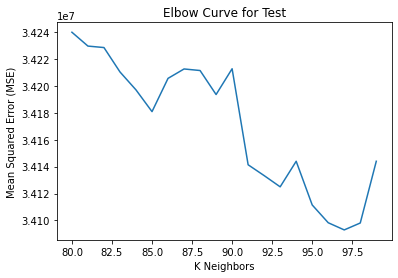

In [ ]:
K = range(80, 100)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

In [ ]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor.fit(train_x,train_y)
print('Accuracy on Testing set: %.1f ' %(regressor.score(train_x,train_y)*100))

Accuracy on Testing set: 76.2 


In [ ]:
from sklearn.linear_model import Ridge,ElasticNet

ridge=Ridge(alpha=2,max_iter=1000,random_state=1)
ridge.fit(train_x,train_y)
print('Accuracy on Testing set: %.1f ' %(ridge.score(test_x,test_y)*100))

Accuracy on Testing set: 76.8 


In [ ]:
from sklearn.ensemble import RandomForestRegressor
new_model = KNN_Reg(n_neighbors=97)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

rf_reg = RandomForestRegressor(random_state=1)
rf_reg.fit(train_x, train_y)
print('Accuracy on Testing set: %.1f ' %(rf_reg.score(test_x,test_y)*100))

Accuracy on Testing set: 95.7 


In [ ]:
def knn_alg(X_train, y_train, X_test, y_test, N):
    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(X_train, y_train)

    try:
        knn.predict(X_test)
    except NotFittedError as e:
        print(repr(e))
        
        data_mobil_bekas = np.array([[2019,5000,145,30.2,2]])
prediction_old = model.predict(data_mobil_bekas)
prediction_new = new_model.predict(data_mobil_bekas)
print(' Hasil Prediksi harga mobil dengan old model: £', prediction_old, 'atau jika dirupiahkan yaitu: Rp', prediction_old * 19110*1e-6, 'Juta\n',
      'Hasil Prediksi harga mobil dengan new model: £', prediction_new, 'atau jika dirupiahkan yaitu: Rp', prediction_new * 19110*1e-6, 'Juta')

 Hasil Prediksi harga mobil dengan old model: £ [15614.325] atau jika dirupiahkan yaitu: Rp [298.38975075] Juta
 Hasil Prediksi harga mobil dengan new model: £ [14988.65979381] atau jika dirupiahkan yaitu: Rp [286.43328866] Juta


In [ ]:
data_mobil_bekas = np.array([[2019,15000,200,20.4,3]])
prediction_old = model.predict(data_mobil_bekas)
prediction_new = new_model.predict(data_mobil_bekas)
print(' Hasil Prediksi harga mobil dengan old model: £', prediction_old, 'atau jika dirupiahkan yaitu: Rp', prediction_old * 19110*1e-6, 'Juta\n',
      'Hasil Prediksi harga mobil dengan new model: £', prediction_new, 'atau jika dirupiahkan yaitu: Rp', prediction_new * 19110*1e-6, 'Juta')

 Hasil Prediksi harga mobil dengan old model: £ [12361.525] atau jika dirupiahkan yaitu: Rp [236.22874275] Juta
 Hasil Prediksi harga mobil dengan new model: £ [12034.32989691] atau jika dirupiahkan yaitu: Rp [229.97604433] Juta
